## LSTM Forecasting model

In [1]:
import pandas as pd
import tensorflow as tf

tf.random.set_seed(42)

##### Utility program to convert sequence into supervised dataset format

In [2]:
def sequence_to_table(data, look_back=5):
  """
  :param data: A 1-dimensional Numpy array or list
  :param look_back: The number of values to be considered as features i.e., number of attributes
  :return: DataFrame consist of feature sequence with target timeseries value
  """
  column_name = 'feature'
  columns = []
  for i in range(look_back):
    columns.append(column_name + str(i + 1))
  features, target = [], []
  
  for i in range(len(data) - look_back - 1):
    feature = data[i:i+look_back]
    if len(feature) != look_back:
      continue
    features.append(feature)
    target.append(data[i+look_back])
  df = pd.DataFrame(features)
  df.columns = columns
  df['next'] = pd.Series(target)
  return df

### Loading dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/aqf/data/delhi.csv', parse_dates=True)
df.set_index('date', inplace=True)
df.head()

,PM25
date,
2014-12-10,231.0
2014-12-11,201.0
2014-12-12,237.0
2014-12-13,295.0
2014-12-14,185.0


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df)
data = scaler.transform(df).ravel()
data = sequence_to_table(data, look_back=20)

In [5]:
X = data.drop(columns=['next']).values
y = data.next.values

In [6]:
print("===== Original train shape =====")
print(X.shape)

X = X.reshape((X.shape[0], X.shape[1], 1))
print("===== Shape after reshaping =====")
print(X.shape)

===== Original train shape =====
(2666, 20)
===== Shape after reshaping =====
(2666, 20, 1)


#### Neural Network model with 1 LSTM and 1 Dense layer

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X, y, epochs=100, batch_size=7)

Epoch 1/100
381/381 [==============================] - 4s 8ms/step - loss: 0.0071
Epoch 2/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0033
Epoch 3/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0031
Epoch 4/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0029
Epoch 5/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0026
Epoch 6/100
381/381 [==============================] - 4s 10ms/step - loss: 0.0026
Epoch 7/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0024
Epoch 8/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0024
Epoch 9/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0024
Epoch 10/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 11/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 12/100
381/381 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 13/100

In [ ]:
import numpy as np

feature = X[-1]
predictions = []
no_of_days = 10

for i in range(no_of_days):
  feature = feature.reshape(1, 20, 1)
  prediction = model.predict(feature)[0][0]
  feature = feature.ravel()
  feature = np.delete(feature, 0)
  feature = np.append(feature, prediction)
  predictions.append(prediction)

1/1 [==============================] - 0s 21ms/step


In [ ]:
forecast = model.predict(X)

84/84 [==============================] - 0s 3ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

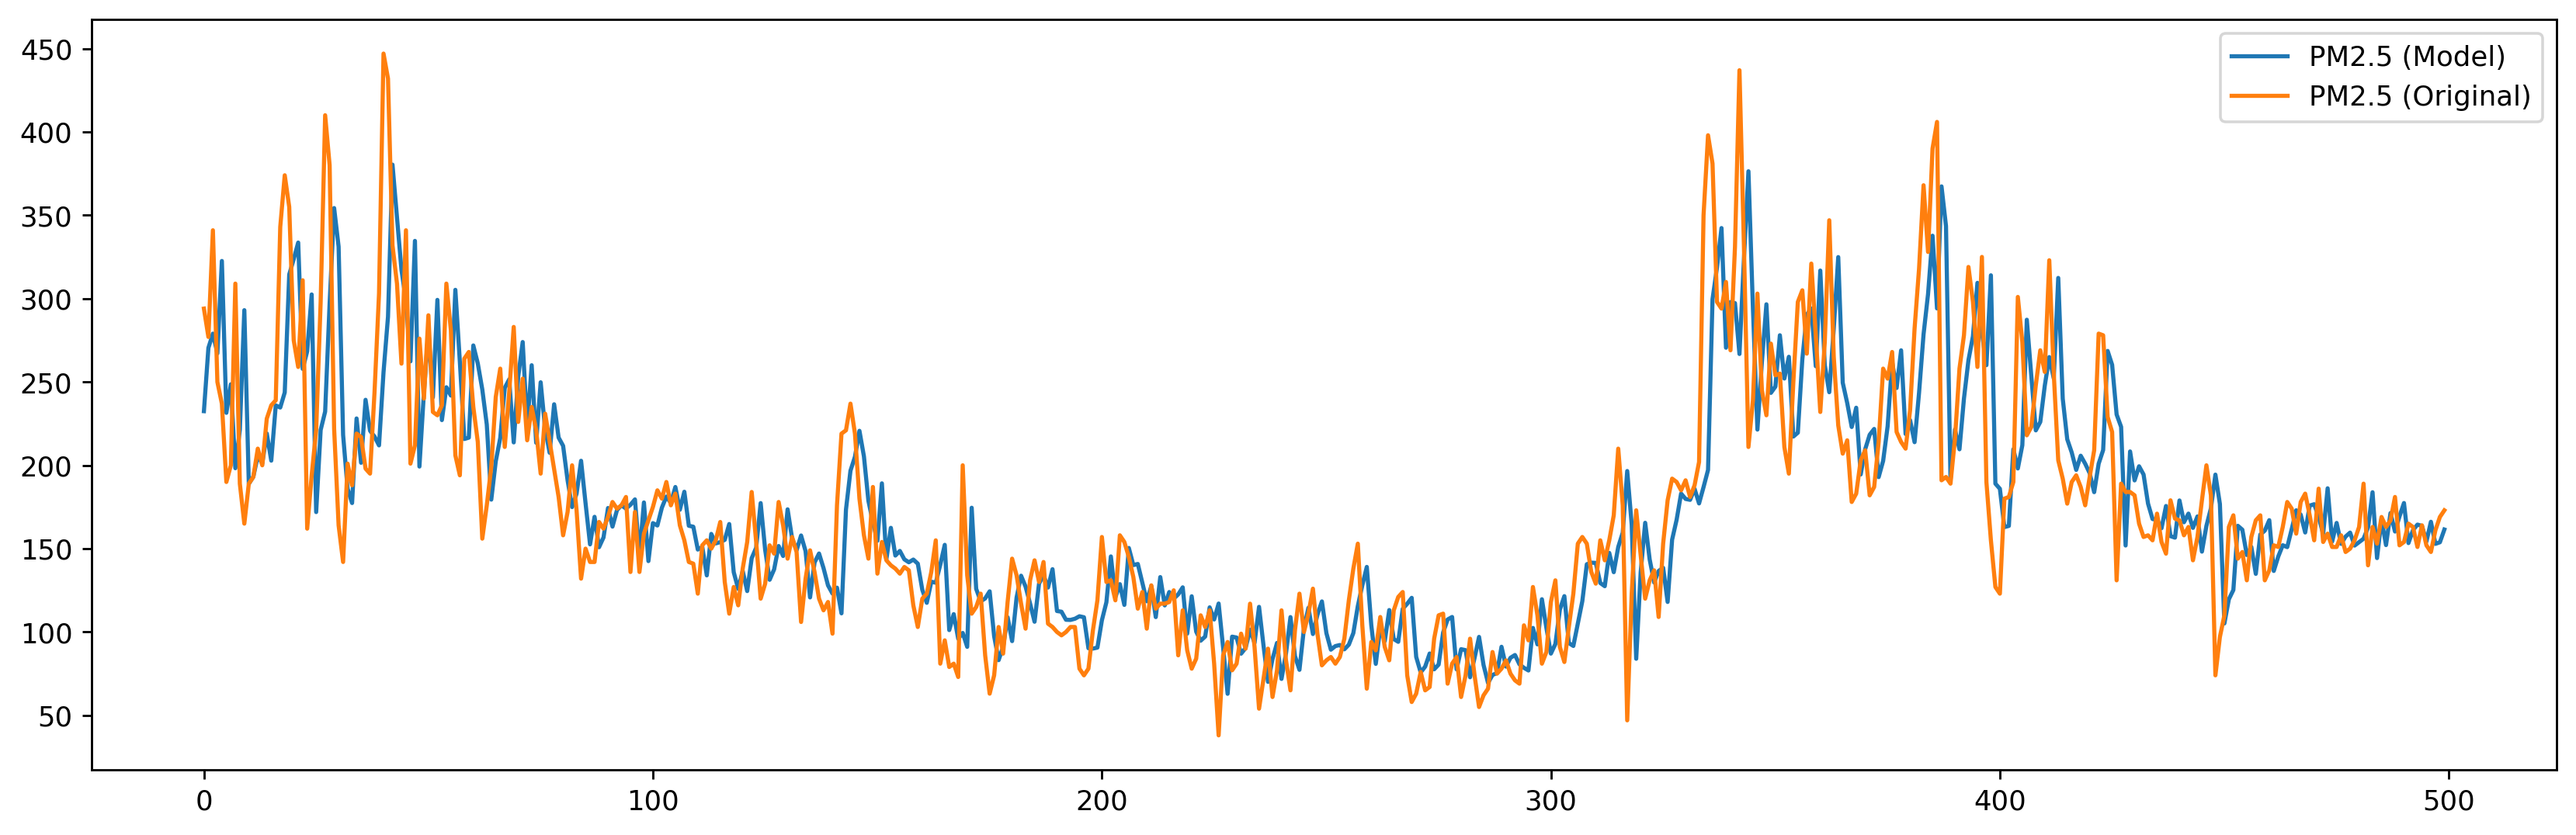

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5)).set_dpi(256)
plt.plot(forecast[-500:], label='PM2.5 (Model)')
plt.plot(df[-500:].values, label='PM2.5 (Original)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print('%.2f' % r2_score(df[21:].values, forecast))

0.67


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('%.2f' % sqrt(mean_squared_error(df[21:].values, forecast)))

46.16


In [ ]:
from math import sqrt

mse = model.evaluate(X, y)
rmse = round(sqrt(mse), 2)
print('RMSE:', rmse)

84/84 [==============================] - 1s 6ms/step - loss: 0.0022
RMSE: 0.05


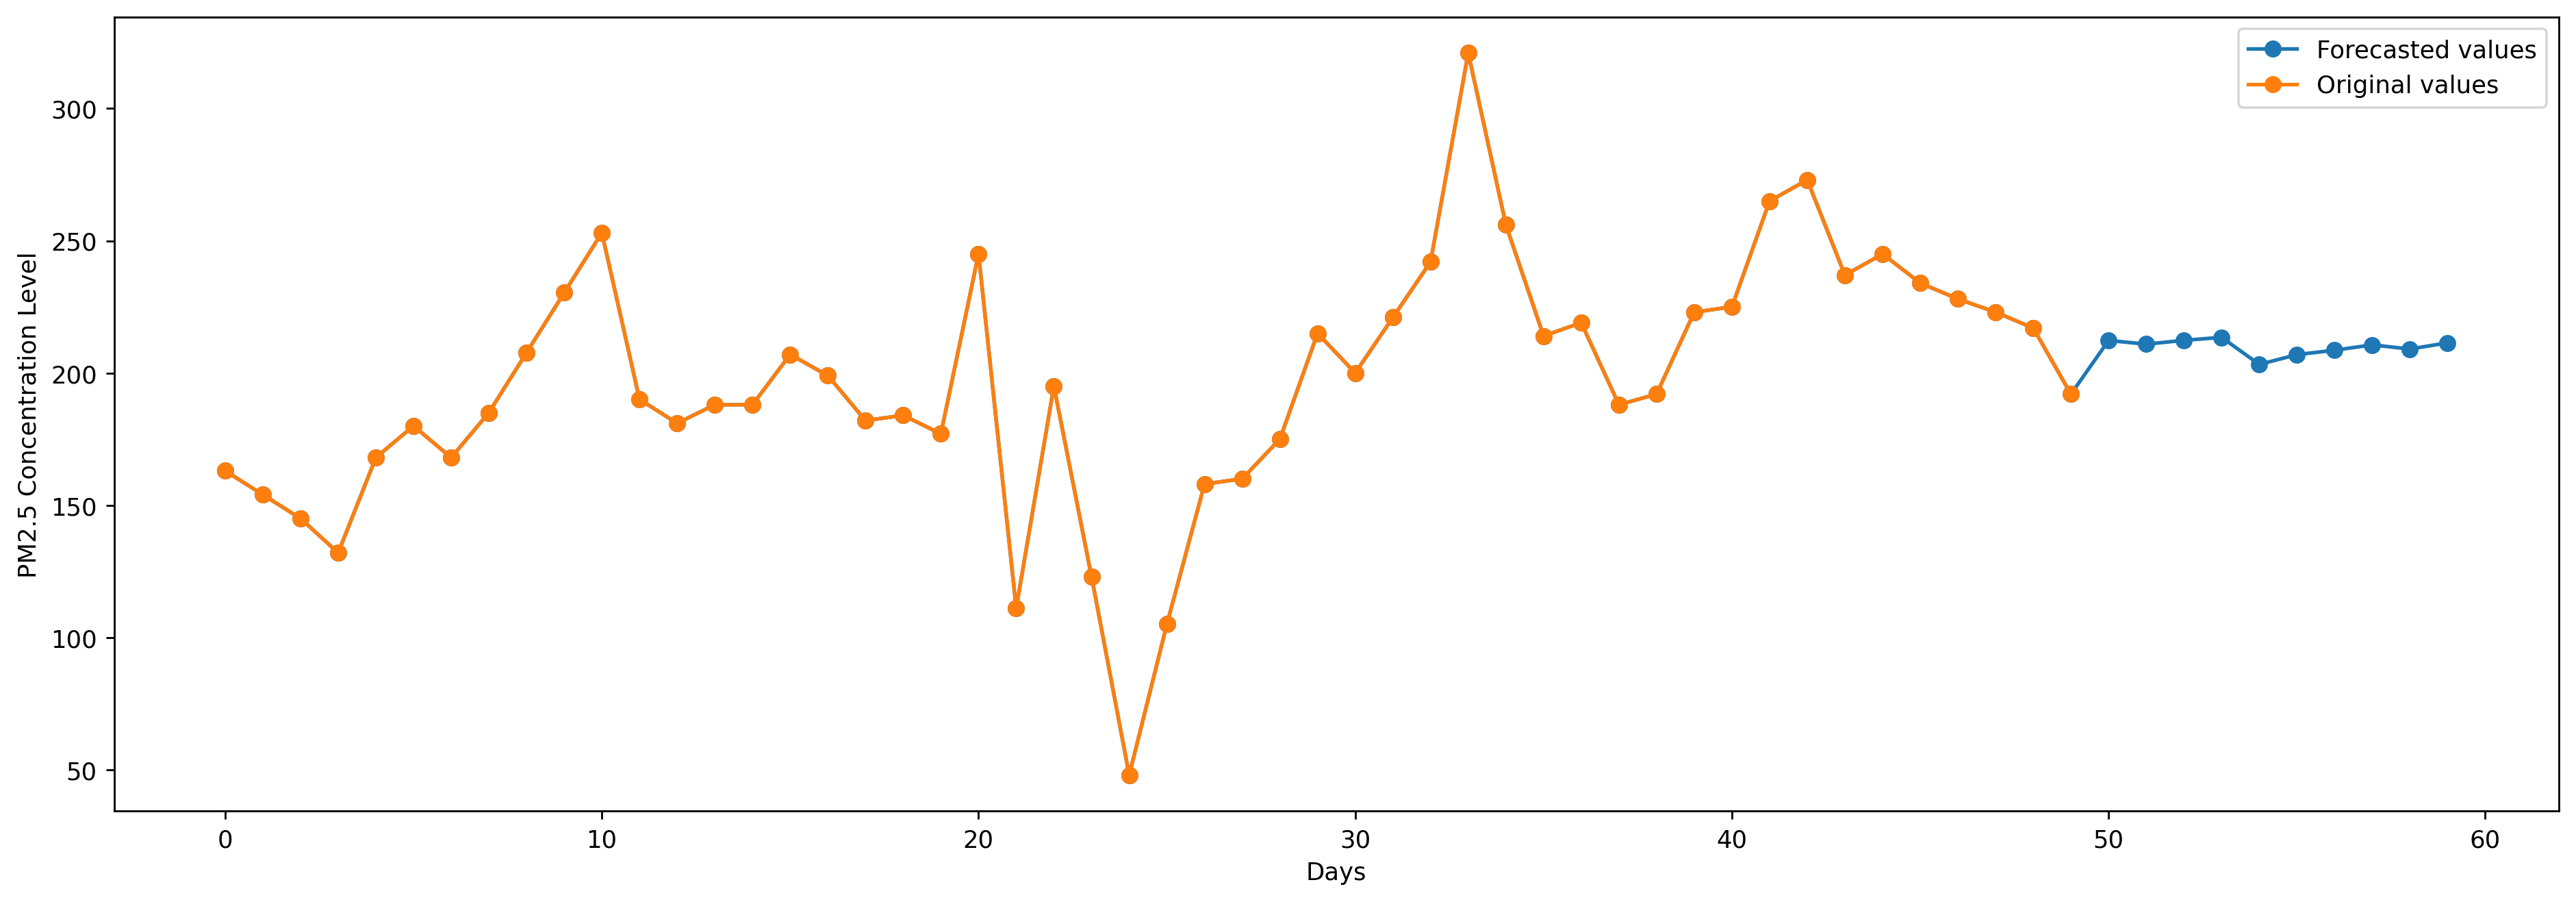

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6)).set_dpi(256)
plt.plot(np.append(df[-50:].values, predictions), label='Forecasted values', marker='o')
plt.plot(df[-50:].values, label='Original values', marker='o')
plt.xlabel('Days')
plt.ylabel('PM2.5 Concentration Level')
plt.legend()
plt.show()

In [ ]:
for i in predictions:
  print(i)

182.47447
178.4152
176.92813
174.96016
169.12643
174.03795
176.51102
177.83246
175.71507
177.33575


In [ ]:
print(df[-30:])

             PM25
date             
2022-03-20  155.0
2022-03-21  186.0
2022-03-22  154.0
2022-03-23  159.0
2022-03-24  151.0
2022-03-25  151.0
2022-03-26  158.0
2022-03-27  148.0
2022-03-28  150.0
2022-03-29  155.0
2022-03-30  163.0
2022-03-31  189.0
2022-04-01  140.0
2022-04-02  163.0
2022-04-03  153.0
2022-04-04  169.0
2022-04-05  163.0
2022-04-06  167.0
2022-04-07  181.0
2022-04-08  152.0
2022-04-09  154.0
2022-04-10  165.0
2022-04-11  163.0
2022-04-12  151.0
2022-04-13  164.0
2022-04-14  152.0
2022-04-15  148.0
2022-04-16  161.0
2022-04-17  169.0
2022-04-18  173.0


End of file